## Brief Description: 
Our project topic is to train a model using reinforcement learning 
on traffic signal control optimization. We are motivated as many Torontonians suffer from heavy 
traffic jams on a daily basis, especially in urban areas where many intersections and traffic lights 
exist. Our goal is to decrease the average travel time by adaptively adjusting the timers on 
individual traffic lights, respectively, so that the overall traffic flow can be smoother, leading to 
an overall shorter travel time. By having a better model, we hope to alleviate the stress of traffic 
for urban commuters. Applying this dynamic model will increase people’s work efficiency, save 
fuel wasted in congested traffic, and improve the overall living experience of urban resi

In this project, we would like to proposed a fine-tuning deep Q-learning model and compare our model’s performance 
with the simple deep q-learning algorithm, which is also a reinforcement learning model provided from the TSCC as sample baseline model built using keras.ents. 


## Data loading and Link to the dataset: 
We have identified a GitHub repository (https://github.com/traffic-signalcontrol/sample-code)
with useable simulation. This repository was prepared for the Traffic Signal Control Competition (TSCC), which took place 6 years ago. In the data folder, the repository has provided various simulated traffic situations for the City of Hangzhou, Manhattan, 
and a purely synthetic city. Below is a illustration of a intersection from TSCC:

Figure 1 Description of the intersection
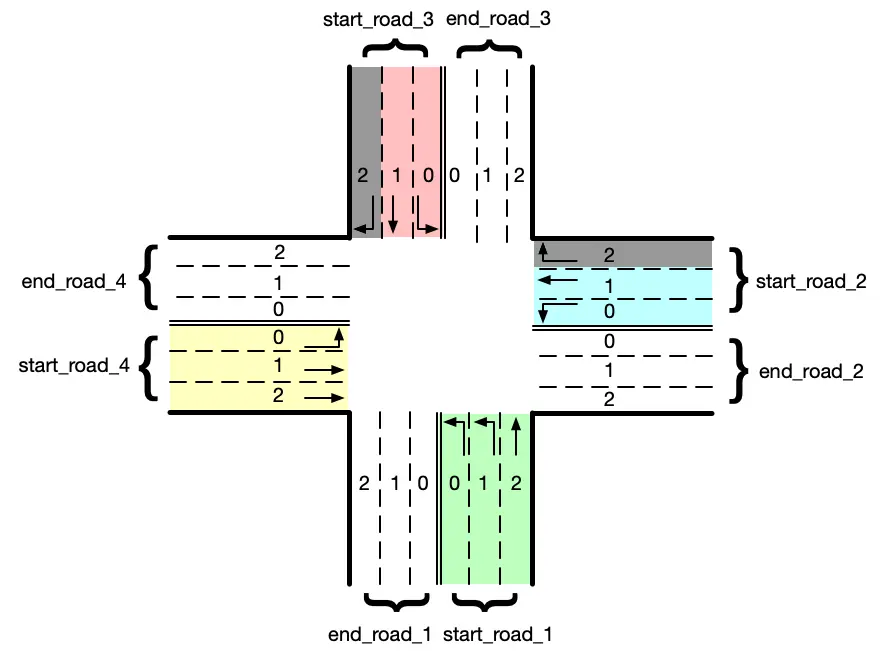

Road: For an intersection, there are two kinds of roads: start road and end road. 
Start road is where a car enters an intersection; end road is where a car leaves an intersection. Figure 1 shows a typical intersection with four start roads and four end roads.

Lane: Each road can be divided into one or multiple lanes, indexed by 0, 1, ... from the inner lane to the outter lane. Lane_id = road_id_{i}, where i is the lane index.

Roadlink (road id - road id): A roadlink is defined as the traffic moving from one start road towards another end road. Roadlinks are contained in the list of intersection["roadLinks"]. Each roadlink is stored in a dictionary like:
road_link = {"type":..., "startRoad":..., "endRoad":...,
             "direction":..., "laneLinks":...}

Lanelink: A roadlink consists of several lanelinks. The dictionary of lanelink is like:
lane_link = {"startLaneIndex":..., "endLaneIndex":..., "points":...}

The part of points are the geometric points to define the lane physical positions. "startLaneIndex" means the lane index of the start road while "endLaneIndex" is the lane index of the end road.

Signal phase: A specific combination of roadlinks can form a signal phase.3d7618.png)

# Brief visualization of the dataset

In [30]:
import json
import pandas as pd
import random

# Load the roadnet.json file
roadnet_file = "roadnet.json"
with open(roadnet_file, "r") as f:
    roadnet_data = json.load(f)

# Load the flow.json file
flow_file = "flow.json"
with open(flow_file, "r") as f:
    flow_data = json.load(f)

# Extracting a sample of 10 intersections from roadnet.json (if available)
roadnet_sample = random.sample(roadnet_data["intersections"], min(10, len(roadnet_data["intersections"])))

# Convert to DataFrame
df_roadnet = pd.DataFrame(roadnet_sample)

# Extracting a sample of 10 vehicle flows from flow.json (if available)
flow_sample = random.sample(flow_data, min(10, len(flow_data)))

# Convert to DataFrame
df_flow = pd.DataFrame(flow_sample)

# Display both tables in Jupyter Notebook
print("Roadnet Sample Data:")
display(df_roadnet)

print("\nFlow Sample Data:")
display(df_flow)

Roadnet Sample Data:


id                point  width  \
0  intersection_0_1  {'x': -300, 'y': 0}      0   
1  intersection_1_0  {'x': 0, 'y': -300}      0   
2  intersection_2_1   {'x': 300, 'y': 0}      0   
3  intersection_1_2   {'x': 0, 'y': 300}      0   
4  intersection_1_1     {'x': 0, 'y': 0}     10   

                                               roads  \
0                           [road_1_1_2, road_0_1_0]   
1                           [road_1_1_3, road_1_0_1]   
2                           [road_1_1_0, road_2_1_2]   
3                           [road_1_1_1, road_1_2_3]   
4  [road_0_1_0, road_1_0_1, road_2_1_2, road_1_2_...   

                                           roadLinks  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [{'type': 'go_straight', 'startRoad': 'road_0_...   

                                        trafficLight  virtual  
0  {'roadLinkIndices': [], 'lightphases': [{'time...     True  
1  {'roadLinkIndices': [], 'lightphases': [{'time...     True  
2  {'roadLinkIndices': [], 'lightphases': [{'time...     True  
3  {'roadLinkIndices': [], 'lightphases': [{'time...     True  
4  {'roadLinkIndices': [0, 1, 2, 3, 4, 5, 6, 7], ...    False


Flow Sample Data:


vehicle  \
0  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
1  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
2  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
3  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
4  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
5  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
6  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
7  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
8  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   
9  {'length': 5.0, 'width': 2.0, 'maxPosAcc': 2.0...   

                      route  interval  startTime  endTime  
0  [road_0_1_0, road_1_1_0]         5       3130     3130  
1  [road_1_0_1, road_1_1_1]         5       2312     2312  
2  [road_1_0_1, road_1_1_1]         5        161      161  
3  [road_1_2_3, road_1_1_3]         5        464      464  
4  [road_0_1_0, road_1_1_0]         5       3288     3288  
5  [road_1_0_1, road_1_1_1]         5       1959     1959  
6  [road_1_0_1, road_1_1_1]         5       1473     1473  
7  [road_1_0_1, road_1_1_1]         5       2626     2626  
8  [road_1_0_1, road_1_1_1]         5       2124     2124  
9  [road_1_0_1, road_1_1_1]         5        566      566

# BaseLine model
The baseline model is provided by TSCC and built using Keras.

In [ ]:
!docker ps -a
!docker ps
!docker run -v C:\Users\520sh\Desktop\MIE1517\project\TSCC2019:/workspace -w /workspace competition python3 run_rl.py --scenario "hangzhou_1x1_bc-tyc_18041607_1h" --num_step 3600



CONTAINER ID   IMAGE                COMMAND                   CREATED          STATUS                     PORTS     NAMES
8b484f89d425   competition          "python3 run_rl.py -…"   2 minutes ago    Exited (2) 2 minutes ago             gallant_lichterman
c53d0411978c   competition          "python3 run_rl.py -…"   2 minutes ago    Exited (2) 2 minutes ago             elegant_lederberg
16c55fcb0d77   competition          "/bin/bash"               7 minutes ago    Up 7 minutes                         angry_mendeleev
c406966e5610   competition:latest   "/bin/bash"               10 minutes ago   Exited (0) 8 minutes ago             1517
CONTAINER ID   IMAGE         COMMAND       CREATED         STATUS         PORTS     NAMES
16c55fcb0d77   competition   "/bin/bash"   7 minutes ago   Up 7 minutes             angry_mendeleev
episode: 0/100, time: 5, acton: 1, reward: 0
episode: 0/100, time: 11, acton: 5, reward: 0
episode: 0/100, time: 17, acton: 1, reward: 0
episode: 0/100, time: 23, acton

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2025-03-11 02:01:53.793027: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-03-11 02:01:53.810349: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3110410000 Hz
2025-03-11 02:01:53.813758: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0xe4f3320 executing computations on platform Host. Devices:
2025-03-11 02:01:53.813791: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Instructions for updating:
Use tf.cast instead.



episode: 0/100, time: 3328, acton: 3, reward: -122
episode: 0/100, time: 3334, acton: 5, reward: -124
episode: 0/100, time: 3335, acton: 5, reward: -124
episode: 0/100, time: 3341, acton: 2, reward: -127
episode: 0/100, time: 3347, acton: 6, reward: -123
episode: 0/100, time: 3353, acton: 7, reward: -124
episode: 0/100, time: 3359, acton: 4, reward: -125
episode: 0/100, time: 3360, acton: 4, reward: -127
episode: 0/100, time: 3366, acton: 7, reward: -130
episode: 0/100, time: 3372, acton: 4, reward: -126
episode: 0/100, time: 3378, acton: 5, reward: -129
episode: 0/100, time: 3384, acton: 8, reward: -134
episode: 0/100, time: 3390, acton: 5, reward: -136
episode: 0/100, time: 3396, acton: 7, reward: -136
episode: 0/100, time: 3402, acton: 1, reward: -131
episode: 0/100, time: 3408, acton: 2, reward: -127
episode: 0/100, time: 3414, acton: 4, reward: -118
episode: 0/100, time: 3420, acton: 6, reward: -119
episode: 0/100, time: 3426, acton: 2, reward: -118
episode: 0/100, time: 3432, ac


episode: 40/100, time: 3575, acton: 6, reward: -113
episode: 40/100, time: 3581, acton: 4, reward: -119
episode: 40/100, time: 3587, acton: 2, reward: -122
episode: 40/100, time: 3588, acton: 2, reward: -121
episode: 40/100, time: 3594, acton: 7, reward: -121
episode: 41/100, time: 0, acton: 6, reward: 0
episode: 41/100, time: 1, acton: 6, reward: 0
episode: 41/100, time: 2, acton: 6, reward: 0
episode: 41/100, time: 3, acton: 6, reward: 0
episode: 41/100, time: 4, acton: 6, reward: 0
episode: 41/100, time: 5, acton: 6, reward: 0
episode: 41/100, time: 11, acton: 3, reward: 0
episode: 41/100, time: 17, acton: 8, reward: 0
episode: 41/100, time: 23, acton: 6, reward: 0
episode: 41/100, time: 24, acton: 6, reward: 0
episode: 41/100, time: 25, acton: 6, reward: 0
episode: 41/100, time: 31, acton: 7, reward: -1
episode: 41/100, time: 37, acton: 8, reward: 0
episode: 41/100, time: 43, acton: 1, reward: 0
episode: 41/100, time: 49, acton: 2, reward: 0
episode: 41/100, time: 55, acton: 3, re

In [7]:
!docker run -v C:\Users\520sh\Desktop\MIE1517\project\TSCC2019:/workspace -w /workspace competition python3 evaluate.py


Time: 100.0 / 3600
Time: 200.0 / 3600
Time: 300.0 / 3600
Time: 400.0 / 3600
Time: 500.0 / 3600
Time: 600.0 / 3600
Time: 700.0 / 3600
Time: 800.0 / 3600
Time: 900.0 / 3600
Time: 1000.0 / 3600
Time: 1100.0 / 3600
Time: 1200.0 / 3600
Time: 1300.0 / 3600
Time: 1400.0 / 3600
Time: 1500.0 / 3600
Time: 1600.0 / 3600
Time: 1700.0 / 3600
Time: 1800.0 / 3600
Time: 1900.0 / 3600
Time: 2000.0 / 3600
Time: 2100.0 / 3600
Time: 2200.0 / 3600
Time: 2300.0 / 3600
Time: 2400.0 / 3600
Time: 2500.0 / 3600
Time: 2600.0 / 3600
Time: 2700.0 / 3600
Time: 2800.0 / 3600
Time: 2900.0 / 3600
Time: 3000.0 / 3600
Time: 3100.0 / 3600
Time: 3200.0 / 3600
Time: 3300.0 / 3600
Time: 3400.0 / 3600
Time: 3500.0 / 3600
Time: 3600.0 / 3600
====================== travel time ======================
scenario_hangzhou_1x1_bc-tyc_18041607_1h: 847.71 s
====================== travel time ======================

====================== score ======================
scenario_hangzhou_1x1_bc-tyc_18041607_1h: -1.4921745252908452
=======

From the above model, we may see that for our baseline model, for scenario_hangzhou_1x1_bc-tyc_18041607_1h,
we have travel time 847.71s with a score

====================== travel time ======================
scenario_hangzhou_1x1_bc-tyc_18041607_1h: 847.71 s
====================== travel time ======================

====================== score ======================
scenario_hangzhou_1x1_bc-tyc_18041607_1h: -1.4921745252908452
====================== score ======================

In [ ]:
!docker ps -a
#!docker container prune -f
!docker ps -a
!docker pull tscc2050/competition
!docker tag tscc2050/competition competition
!winpty docker exec -it my_competition bash
!docker ps -a
!docker start my_competition


CONTAINER ID   IMAGE                COMMAND       CREATED              STATUS                      PORTS     NAMES
fcf5c1d969aa   competition:latest   "/bin/bash"   About a minute ago   Exited (0) 54 seconds ago             my_competition
Deleted Containers:
fcf5c1d969aac6f8269819f897cbdf92acfc40a60da64c71d1f1e42fd69e4022

Total reclaimed space: 4.096kB
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
Using default tag: latest
latest: Pulling from tscc2050/competition
Digest: sha256:c8e38b07ceb690e2d9b5e975fb7df19a4c4bc168cd9894065d990d09d284a8fc
Status: Image is up to date for tscc2050/competition:latest
docker.io/tscc2050/competition:latest


'winpty' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


Error response from daemon: No such container: my_competition
Error: failed to start containers: my_competition


In [46]:
!docker run competition python3 --version
!docker run competition python3 -c "import engine"

Python 3.6.5


In [51]:
# 1️⃣ Update and install required system packages (fixes Pillow error)
!docker run competition apt update && apt install -y python3-pip libjpeg-dev zlib1g-dev libpng-dev

# 2️⃣ Upgrade pip before installing anything (fixes old pip issue)
!docker run competition python3 -m pip install --upgrade pip setuptools wheel

# 3️⃣ Install Pillow separately first (fixes dependency issue)
!docker run competition python3 -m pip install --no-cache-dir --force-reinstall --no-binary :all: Pillow

# 4️⃣ Now install Torch (will use upgraded pip and system packages)
!docker run competition python3 -m pip install torch torchvision torchaudio


Hit:1 http://mirrors.ustc.edu.cn/ubuntu xenial InRelease
Get:2 http://mirrors.ustc.edu.cn/ubuntu xenial-security InRelease [106 kB]
Get:3 http://mirrors.ustc.edu.cn/ubuntu xenial-updates InRelease [106 kB]
Get:4 http://mirrors.ustc.edu.cn/ubuntu xenial-backports InRelease [106 kB]
Get:5 http://mirrors.ustc.edu.cn/ubuntu xenial-security/main Sources [312 kB]
Get:6 http://mirrors.ustc.edu.cn/ubuntu xenial-security/restricted Sources [3239 B]
Get:7 http://mirrors.ustc.edu.cn/ubuntu xenial-security/universe Sources [257 kB]
Get:8 http://mirrors.ustc.edu.cn/ubuntu xenial-security/multiverse Sources [4950 B]
Get:9 http://mirrors.ustc.edu.cn/ubuntu xenial-security/main amd64 Packages [1151 kB]
Get:10 http://mirrors.ustc.edu.cn/ubuntu xenial-security/restricted amd64 Packages [15.9 kB]
Get:11 http://mirrors.ustc.edu.cn/ubuntu xenial-security/universe amd64 Packages [928 kB]
Get:12 http://mirrors.ustc.edu.cn/ubuntu xenial-security/multiverse amd64 Packages [8820 B]
Get:13 http://mirrors.ustc.ed



'apt' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
You are using pip version 21.3.1, however version 25.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3
  Found existing installation: setuptools 39.0.1
    Uninstalling setuptools-39.0.1:
      Successfully uninstalled setuptools-39.0.1
  Found existing installation: wheel 0.33.1
    Uninstalling wheel-0.33.1:
      Successfully uninstalled wheel-0.33.1
  Running setup.py install for Pillow: started
    Running setup.py install for Pillow: finished with status 'error'
    Complete output from command /usr/local/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-9df4gxeq/Pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-997zkfe9-record/install-record.txt --single-version-externally-managed --compile:
    /usr/local/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'long_description_content_type'
      warnings.

Command "/usr/local/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-9df4gxeq/Pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-997zkfe9-record/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-build-9df4gxeq/Pillow/
You are using pip version 9.0.3, however version 25.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


  Running setup.py bdist_wheel for pillow: started
  Running setup.py bdist_wheel for pillow: finished with status 'error'
  Complete output from command /usr/local/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-n0w8o5k0/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpvfu52x2epip-wheel- --python-tag cp36:
  /usr/local/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'long_description_content_type'
    warnings.warn(msg)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/PIL
  copying src/PIL/TiffTags.py -> build/lib.linux-x86_64-3.6/PIL
  copying src/PIL/PcxImagePlugin.py -> build/lib.linux-x86_64-3.6/PIL
  copying src/PIL/ImageMath.py -> build/lib.linux-x86_64-3.6/PIL
  copying src/PIL/ImageTransform.py -> build/li

  Failed building wheel for pillow
Command "/usr/local/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-n0w8o5k0/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-hrdn4k_j-record/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-build-n0w8o5k0/pillow/
You are using pip version 9.0.3, however version 25.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
!docker run competition python3 -m pip install --upgrade pip setuptools wheel
!docker run competition apt update && apt install -y python3-pip libjpeg-dev zlib1g-dev libpng-dev
!docker run competition python3 -m pip install torch torchvision torchaudio

  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3
  Found existing installation: setuptools 39.0.1
    Uninstalling setuptools-39.0.1:
      Successfully uninstalled setuptools-39.0.1
  Found existing installation: wheel 0.33.1
    Uninstalling wheel-0.33.1:
      Successfully uninstalled wheel-0.33.1


You are using pip version 21.3.1, however version 25.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Hit:1 http://mirrors.ustc.edu.cn/ubuntu xenial InRelease
Get:2 http://mirrors.ustc.edu.cn/ubuntu xenial-security InRelease [106 kB]
Get:3 http://mirrors.ustc.edu.cn/ubuntu xenial-updates InRelease [106 kB]
Get:4 http://mirrors.ustc.edu.cn/ubuntu xenial-backports InRelease [106 kB]
Get:5 http://mirrors.ustc.edu.cn/ubuntu xenial-security/main Sources [312 kB]
Get:6 http://mirrors.ustc.edu.cn/ubuntu xenial-security/restricted Sources [3239 B]
Get:7 http://mirrors.ustc.edu.cn/ubuntu xenial-security/universe Sources [257 kB]
Get:8 http://mirrors.ustc.edu.cn/ubuntu xenial-security/multiverse Sources [4950 B]
Get:9 http://mirrors.ustc.edu.cn/ubuntu xenial-security/main amd64 Packages [1151 kB]
Get:10 http://mirrors.ustc.edu.cn/ubuntu xenial-security/restricted amd64 Packages [15.9 kB]
Get:11 http://mirrors.ustc.edu.cn/ubuntu xenial-security/universe amd64 Packages [928 kB]
Get:12 http://mirrors.ustc.edu.cn/ubuntu xenial-security/multiverse amd64 Packages [8820 B]
Get:13 http://mirrors.ustc.ed



'apt' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
invalid argument "ompetition" for "-c, --cpu-shares" flag: strconv.ParseInt: parsing "ompetition": invalid syntax
See 'docker run --help'.


In [ ]:
!docker ps -a
!docker container prune -f
!docker ps -a

CONTAINER ID   IMAGE                         COMMAND                   CREATED              STATUS                          PORTS     NAMES
cc07c474c4cd   competition                   "python3 run_rl.py -…"   About a minute ago   Exited (2) About a minute ago             elastic_sammet
9ca8d3d6d252   competition                   "python3 run_rl.py -…"   3 minutes ago        Exited (2) 3 minutes ago                  stupefied_meitner
33cdf5e9dbe7   competition:latest            "python3 run_rl.py -…"   3 minutes ago        Exited (2) 3 minutes ago                  objective_ganguly
337719f97b8a   competition                   "python3 run_rl.py -…"   5 minutes ago        Exited (2) 5 minutes ago                  competent_germain
5504bff08a81   competition                   "python3 -m pip inst…"   10 minutes ago       Exited (1) 7 minutes ago                  romantic_khorana
f77e9d9f718f   competition                   "python3 -m pip inst…"   10 minutes ago       Exited (1) 10 minu

In [4]:
!docker run competition python3 run_rl.py --scenario "hangzhou_1x1_bc-tyc_18041607_1h" --num_step 3600

python3: can't open file 'run_rl.py': [Errno 2] No such file or directory


In [50]:
!docker ps --format "table {{.ID}}\t{{.Names}}\t{{.Status}}\t{{.Ports}}"


{.ID}     {.Names}   {.Status}   {.Ports}
